In [1]:
%matplotlib notebook
# Intégration du graphique dans le NoteBook mettre au début le code suivant %matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 01 Exercice création du DataFrame
students = pd.read_csv('../../Data/students.csv')
students.head()

,Etudiants,Couleur des yeux,Sexe,Mention au Bac,Notes Examens
0,Michel,N,H,AB,13
1,Alan,B,H,B,16
2,Antoine,V,H,B,17
3,Céline,V,F,TB,19
4,Fenley,N,H,P,11


In [2]:
students.describe()

,Notes Examens
count,19.000000
mean,15.052632
std,2.876605
min,11.000000
25%,13.000000
50%,15.000000
75%,17.500000
max,20.000000


In [45]:
students = students.rename(
columns={
    'Couleur des yeux': 'eye_color', 
    'Mention au Bac': 'mention'
})

students.head()

,Etudiants,eye_color,Sexe,mention,Notes Examens
0,Michel,N,H,AB,13
1,Alan,B,H,B,16
2,Antoine,V,H,B,17
3,Céline,V,F,TB,19
4,Fenley,N,H,P,11


In [46]:
grouped = students.groupby("eye_color")
dfgb = grouped[['eye_color']].count()

dfgb.columns = ['Effectifs']
dfgb.head()

,Effectifs
eye_color,
B,3
M,7
N,3
V,6


In [47]:
# Nombre de groupement
NB_GRP = dfgb['Effectifs'].count()

print(NB_GRP)

4


In [48]:
dfgb['Frequences'] = np.round(( dfgb / dfgb.sum()) * 100 , 2 ) 

In [49]:
dfgb.head()

,Effectifs,Frequences
eye_color,,
B,3,15.79
M,7,36.84
N,3,15.79
V,6,31.58


<IPython.core.display.Javascript object>


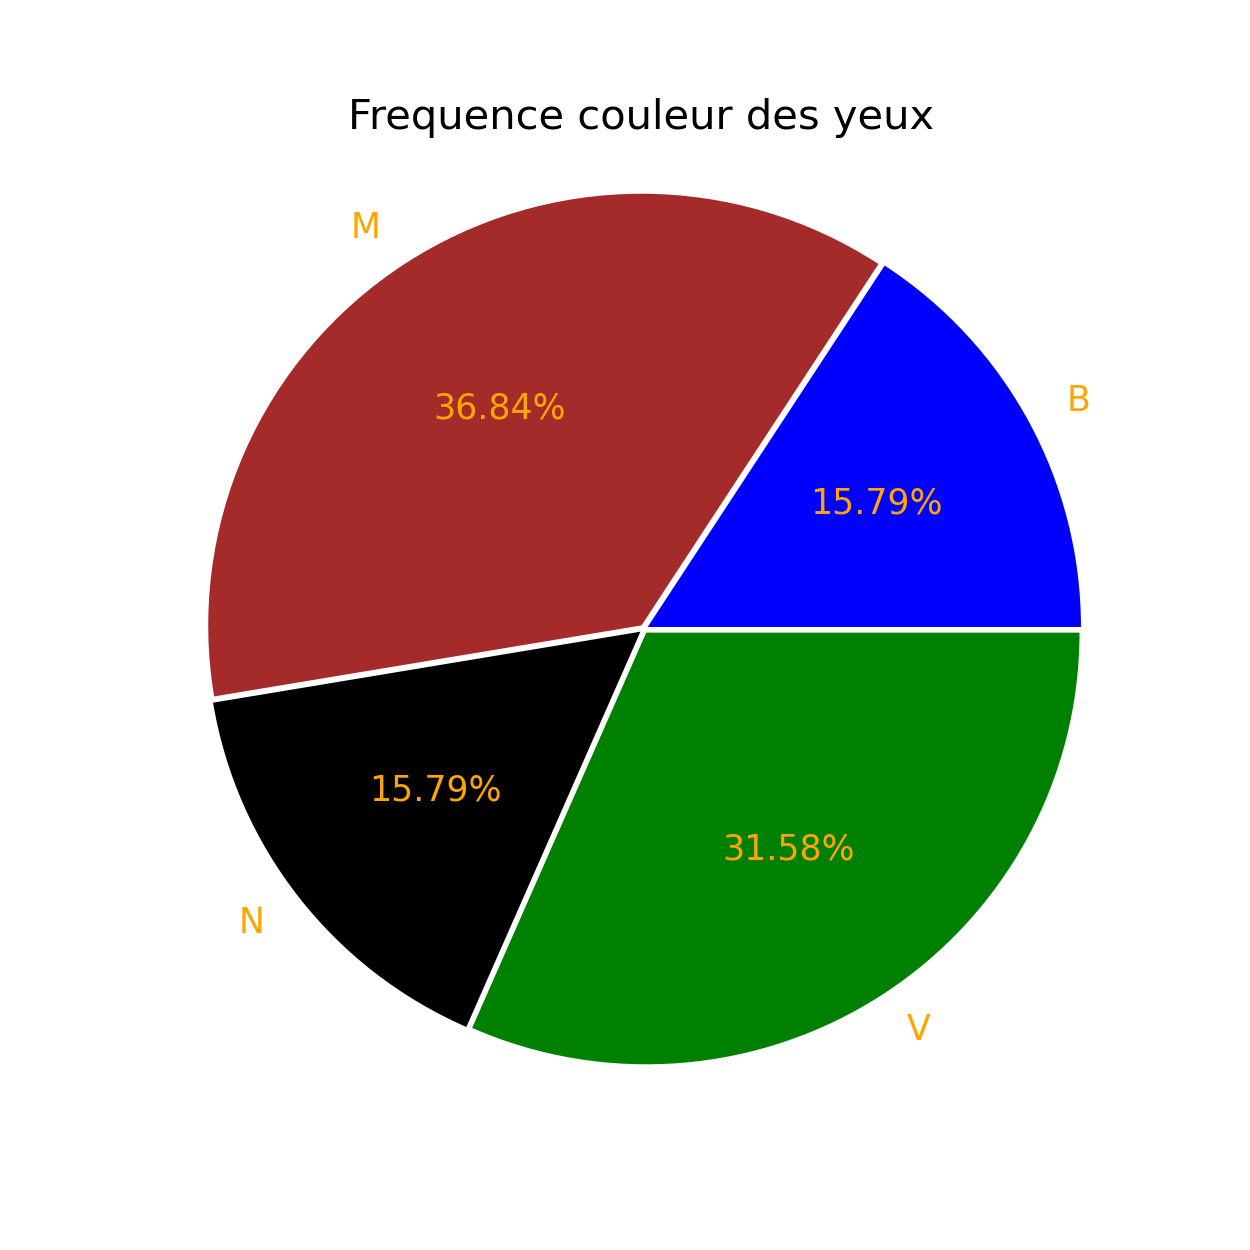

In [55]:
# Représentation circulaire

# approche objet pour définir un graphique
fig, ax = plt.subplots( figsize = (5,5) )

# construire un diagramme circulaire
sizes =  dfgb['Frequences']
labels = dfgb['Frequences'].index
explode = (0.01, 0.01, 0.01, 0.01 ) 
colors = ['blue', 'brown', 'black', 'green']

# print(sizes)
# print(labels)
ax.pie(
    sizes, 
    explode = explode, 
    labels = labels, 
    colors = colors, 
    autopct='%1.2f%%', 
    textprops={'color' : 'orange'} 
)

# Permet d'avoir un meilleur rendu sur les pourcentages partagent le cerlce 
ax.axis('equal')
plt.title("Frequence couleur des yeux")
plt.show()